In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('student.csv',sep = ';')

### 1.	‘Age’라는 변수의 기술통계량을 출력하라.

In [13]:
data.describe()['age']

count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

### 2.	Age에 12개월을 곱한 값을 생성하여 ‘AgeInMonths’라는 새로운 변수를 저장하라.

In [17]:
# data['AgeInMonths'] = data['age']
data['AgeInMonths'] = data['age']*12

In [21]:
data[['age','AgeInMonths']]

,age,AgeInMonths
0,18,216
1,17,204
2,15,180
3,15,180
4,16,192
...,...,...
644,19,228
645,18,216
646,18,216
647,17,204


### 3.	분석에 필요하지 않은 변수인 ‘address’를 제거하라. 

In [23]:
data.drop(labels='address',axis=1,inplace=True)

In [26]:
data.columns

Index(['school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'AgeInMonths'],
      dtype='object')

### 4.	각 성별 별로 ‘Age’의 평균과 분산을 구하라

In [46]:
data.groupby('sex')['age'].mean()

sex
F    16.788512
M    16.680451
Name: age, dtype: float64

In [44]:
data.groupby('sex')['age'].var()

sex
F    1.381857
M    1.629579
Name: age, dtype: float64

### 5.	Boxplot을 이용하여 school변수를 기준으로 GP 그룹과 MS 그룹들의 G3값의 분포를 비교하라. 또한, G3의 평균이 다른지 알아보기 위해 T-test를 수행하라. 

<AxesSubplot:title={'center':'G3'}, xlabel='school'>

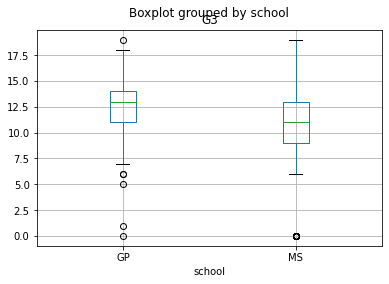

In [58]:
data.boxplot(column='G3',by='school')

In [59]:
g3_gp = data['G3'].loc[data['school'] == 'GP']
g3_ms = data['G3'].loc[data['school'] == 'MS']

In [61]:
from scipy import stats

In [62]:
stats.bartlett(g3_gp,g3_ms)

BartlettResult(statistic=44.35842785003101, pvalue=2.7343232566985352e-11)

In [65]:
stats.ttest_ind(g3_gp,g3_ms,equal_var=False)

Ttest_indResult(statistic=6.754491544530737, pvalue=6.211839408463177e-11)

### 6. School 변수에서 MS와 GP 별로 남학생 수와 여학생 수의 분포가 같 같은 Bar-chart를 이용하여 비교하고, 이에 대한 통계적 검정 (카이제곱 검정)을 수행하여라. (2)

In [68]:
school_g3_table = pd.crosstab(data.G3,data.school)

In [69]:
school_g3_table

school,GP,MS
G3,,
0,1,14
1,1,0
5,1,0
6,2,1
7,3,7
8,14,21
9,10,25
10,53,44
11,70,34


<AxesSubplot:xlabel='G3'>

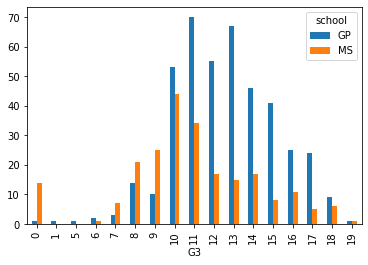

In [70]:
school_g3_table.plot(kind='bar')

In [71]:
stats.chi2_contingency(school_g3_table)

(92.11165991573036,
 1.01973779816641e-12,
 16,
 array([[ 9.77657935,  5.22342065],
        [ 0.65177196,  0.34822804],
        [ 0.65177196,  0.34822804],
        [ 1.95531587,  1.04468413],
        [ 6.51771957,  3.48228043],
        [22.81201849, 12.18798151],
        [22.81201849, 12.18798151],
        [63.22187982, 33.77812018],
        [67.78428351, 36.21571649],
        [46.92758089, 25.07241911],
        [53.44530046, 28.55469954],
        [41.06163328, 21.93836672],
        [31.93682589, 17.06317411],
        [23.46379045, 12.53620955],
        [18.90138675, 10.09861325],
        [ 9.77657935,  5.22342065],
        [ 1.30354391,  0.69645609]]))

### 7. ‘Age’와 ‘G3’ 간의 산점도를 보여라. 또한, Pearson correlation 값을 보여라. (2)

<AxesSubplot:xlabel='age', ylabel='G3'>

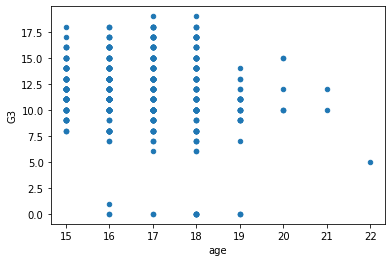

In [74]:
data.plot('age','G3',kind='scatter')

In [75]:
stats.pearsonr(data['age'],data['G3'])

(-0.10650539063847915, 0.0066121152886574434)